# Make your 2020 Presidential Map

### Step by Step instructions are provided, this code may seem complicated, but you don't need to understand it to make your own map. Someone with zero coding experience can still make one of our maps!

Note: By changing this code, it will not change for other users, so don't worry about that. If you mess something up, you can go to this link to start over with the original code: https://mybinder.org/v2/gh/election-perfection/ElectionMaps/master

by https://electionperfection.org

### Step 1: Run this Cell, don't change anything inside. This cell will generate ALOT of output, that's normal. It will tell you to move onto Step 2 when it is complete. This cell may take a minute or so to complete.

How to run a cell: Option 1: click the cell and click the button that looks like this: '>| Run' at the top. Option 2: hit the black button that's next to the cell. Either one works and can be used interchangeably.

In [1]:
!pip install matplotlib
!pip install numpy
!conda install -c conda-forge cartopy --yes
!pip install ipywidgets


import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import matplotlib.gridspec as gridspec
import ipywidgets as widgets

small_states = ['Vermont','New Hampshire','New Jersey','Delaware','Rhode Island','Massachusetts','Connecticut','District of Columbia','Maryland']
print('Step 1 is complete, move on to Step 2')

Step 1 is complete, move on to Step 2


### Step 2: Run this Cell, don't change anything inside.

In [2]:
states = {
    'Alabama':{'Lat':32.806671,'Lon':-86.791130-.5,'EV':9},
    'Alaska':{'Lat':61.370716+2,'Lon':-152.404419,'EV':3},
    'Arizona':{'Lat':33.729759,'Lon':-111.431221-1,'EV':11},
    'Arkansas':{'Lat':34.969704-0.5,'Lon':-92.373123-1,'EV':6},
    'California':{'Lat':36.116203,'Lon':-119.681564-0.5,'EV':55},
    'Colorado':{'Lat':39.059811-.5,'Lon':-105.311104-1,'EV':9},
    'Connecticut':{'Lat':41.597782,'Lon':-72.755371,'EV':7},
    'Delaware':{'Lat':39.318523,'Lon':-75.507141,'EV':3},
    'District of Columbia':{'Lat':38.897438,'Lon':-77.026817,'EV':3},
    'Florida':{'Lat':27.766279,'Lon':-81.686783-.9,'EV':29},
    'Georgia':{'Lat':33.040619-.5,'Lon':-83.643074-1,'EV':16},
    'Hawaii':{'Lat':21.094318,'Lon':-157.498337+1,'EV':4},
    'Idaho':{'Lat':44.240459-0.3,'Lon':-114.478828-1,'EV':4},
    'Illinois':{'Lat':40.349457-.5,'Lon':-88.986137-1,'EV':20},
    'Indiana':{'Lat':39.849426-0.4,'Lon':-86.258278-1,'EV':11},
    'Iowa':{'Lat':42.011539-0.5,'Lon':-93.210526-1, 'EV':6},
    'Kansas':{'Lat':38.526600-0.8,'Lon':-96.726486-2, 'EV':6},
    'Kentucky':{'Lat':37.668140-.4,'Lon':-84.670067-1.5,'EV':8},
    'Louisiana':{'Lat':31.169546-0.2,'Lon':-91.867805-1.5,'EV':8},
    'Maine':{'Lat':44.693947,'Lon':-69.381927-1,'EV':4},
    'Maryland':{'Lat':39.063946,'Lon':-76.802101,'EV':10},
    'Massachusetts':{'Lat':42.230171,'Lon':-71.530106,'EV':11},
    'Michigan':{'Lat':43.326618-0.5,'Lon':-84.536095-1.2,'EV':16},
    'Minnesota':{'Lat':45.694454,'Lon':-93.900192-2,'EV':10},
    'Mississippi':{'Lat':32.741646,'Lon':-89.678696-.5,'EV':6},
    'Missouri':{'Lat':38.456085-0.5,'Lon':-92.288368-1.5,'EV':10},
    'Montana':{'Lat':46.921925-0.5,'Lon':-110.454353,'EV':3},
    'Nebraska':{'Lat':41.125370-0.5,'Lon':-98.268082-2,'EV':5},
    'Nevada':{'Lat':38.313515,'Lon':-117.055374,'EV':6},
    'New Hampshire':{'Lat':43.452492,'Lon':-71.563896,'EV':4},
    'New Jersey':{'Lat':40.298904,'Lon':-74.521011,'EV':14},
    'New Mexico':{'Lat':34.840515-1,'Lon':-106.248482-.5,'EV':5},
    'New York':{'Lat':42.165726+0.5,'Lon':-74.948051-1,'EV':29},
    'North Carolina':{'Lat':35.630066-0.8,'Lon':-79.806419+0.3,'EV':15},
    'North Dakota':{'Lat':47.528912-0.8,'Lon':-99.784012-1,'EV':3},
    'Ohio':{'Lat':40.388783-.7,'Lon':-82.764915-1.2,'EV':18},
    'Oklahoma':{'Lat':35.565342-0.7,'Lon':-96.928917-1.5,'EV':7},
    'Oregon':{'Lat':44.572021-1.3,'Lon':-122.070938+1,'EV':7},
    'Pennsylvania':{'Lat':40.590752+0.3,'Lon':-77.209755-2.5,'EV':20},
    'Rhode Island':{'Lat':41.680893,'Lon':-71.511780,'EV':4},
    'South Carolina':{'Lat':33.856892-0.9,'Lon':-80.945007-0.5,'EV':9},
    'South Dakota':{'Lat':44.299782-0.5,'Lon':-99.438828-1,'EV':3},
    'Tennessee':{'Lat':35.747845-.1,'Lon':-86.692345-1.6,'EV':11},
    'Texas':{'Lat':31.054487,'Lon':-97.563461-2,'EV':38},
    'Utah':{'Lat':40.150032-1.5,'Lon':-111.862434,'EV':6},
    'Vermont':{'Lat':44.045876,'Lon':-72.710686,'EV':3},
    'Virginia':{'Lat':37.769337-.5,'Lon':-78.169968-1,'EV':13},
    'Washington':{'Lat':47.400902-.6,'Lon':-121.490494,'EV':12},
    'West Virginia':{'Lat':38.491226-.7,'Lon':-80.954453-.6,'EV':5},
    'Wisconsin':{'Lat':44.268543-0.2,'Lon':-89.616508-1,'EV':10},
    'Wyoming':{'Lat':42.755966-0.5,'Lon':-107.302490-1,'EV':3}}

print('Move onto Step 3')

Move onto Step 3


### Step 3: Run the cell, then Enter your predictions in the dropdown menus.

#### Instructions
Select Democrat, Republican, or TBD if you wish to leave the state undecided.

#### DO NOT RERUN the cell once you make your selections or you will lose them
Once you have made your selections proceed to the next cell. 
To change your predictions later on in this session, you only need to change the dropdown menus here, then rerun the following cells, you never have to rerun this particular cell to adopt the change. 

Once you leave this page your changes will disapear, so make sure you follow the instructions to save your map at the end in Step 6.

In [9]:
alabama_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Alabama')
display(alabama_menu)

alaska_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Alaska')
display(alaska_menu)

arizona_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Arizona')
display(arizona_menu)

arkansas_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Arkansas')
display(arkansas_menu)

california_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='California')
display(california_menu)

colorado_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Colorado')
display(colorado_menu)

connecticut_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Connecticut')
display(connecticut_menu)

delaware_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Delaware')
display(delaware_menu)

florida_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Florida')
display(florida_menu)

georgia_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Georgia')
display(georgia_menu)

hawaii_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Hawaii')
display(hawaii_menu)

idaho_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Idaho')
display(idaho_menu)

illinois_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Illinois')
display(illinois_menu)

indiana_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Indiana')
display(indiana_menu)

iowa_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Iowa')
display(iowa_menu)

kansas_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Kansas')
display(kansas_menu)

kentucky_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Kentucky')
display(kentucky_menu)

louisiana_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Louisiana')
display(louisiana_menu)

maine_popular_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Maine Popular')
display(maine_popular_menu)

maine_01_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='ME-01')
display(maine_01_menu)

maine_02_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='ME-02')
display(maine_02_menu)

maryland_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Maryland')
display(maryland_menu)

massachusetts_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Massachusetts')
display(massachusetts_menu)

michigan_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Michigan')
display(michigan_menu)

minnesota_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Minnesota')
display(minnesota_menu)

mississippi_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Mississippi')
display(mississippi_menu)

missouri_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Missouri')
display(missouri_menu)

montana_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Montana')
display(montana_menu)

nebraska_popular_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Neb. Popular')
display(nebraska_popular_menu)

nebraska_01_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='NE-01')
display(nebraska_01_menu)

nebraska_02_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='NE-02')
display(nebraska_02_menu)

nebraska_03_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='NE-03')
display(nebraska_03_menu)

nevada_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Nevada')
display(nevada_menu)

new_hampshire_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='New Hampshire')
display(new_hampshire_menu)

new_jersey_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='New Jersey')
display(new_jersey_menu)

new_mexico_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='New Mexico')
display(new_mexico_menu)

new_york_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='New York')
display(new_york_menu)

north_carolina_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='North Carolina')
display(north_carolina_menu)

north_dakota_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='North Dakota')
display(north_dakota_menu)

ohio_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Ohio')
display(ohio_menu)

oklahoma_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Oklahoma')
display(oklahoma_menu)

oregon_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Oregon')
display(oregon_menu)

pennsylvania_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Pennsylvania')
display(pennsylvania_menu)

rhode_island_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Rhode Island')
display(rhode_island_menu)

south_carolina_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='South Carolina')
display(south_carolina_menu)

south_dakota_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='South Dakota')
display(south_dakota_menu)

tennessee_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Tennessee')
display(tennessee_menu)

texas_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Texas')
display(texas_menu)

utah_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Utah')
display(utah_menu)

vermont_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Vermont')
display(vermont_menu)

virginia_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Virginia')
display(virginia_menu)

washington_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Washington')
display(washington_menu)

washington_dc_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Washington DC')
display(washington_dc_menu)

west_virginia_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='West Virginia')
display(west_virginia_menu)

wisconsin_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Wisconsin')
display(wisconsin_menu)

wyoming_menu = widgets.Dropdown(options=['Democrat', 'Republican', 'TBD'],
    value='TBD',description='Wyoming')
display(wyoming_menu)

Dropdown(description='Alabama', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Alaska', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Arizona', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Arkansas', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='California', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Colorado', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Connecticut', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Delaware', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Florida', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Georgia', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Hawaii', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Idaho', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Illinois', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Indiana', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Iowa', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Kansas', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Kentucky', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Louisiana', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Maine Popular', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='ME-01', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='ME-02', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Maryland', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Massachusetts', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Michigan', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Minnesota', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Mississippi', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Missouri', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Montana', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Nebraska Popular', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='NE-01', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='NE-02', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='NE-03', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Nevada', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='New Hampshire', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='New Jersey', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='New Mexico', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='New York', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='North Carolina', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='North Dakota', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Ohio', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Oklahoma', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Oregon', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Pennsylvania', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Rhode Island', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='South Carolina', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='South Dakota', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Tennessee', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Texas', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Utah', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Vermont', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Virginia', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Washington', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Washington DC', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='West Virginia', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Wisconsin', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

Dropdown(description='Wyoming', index=2, options=('Democrat', 'Republican', 'TBD'), value='TBD')

### Step 4: Run the cell, don't change anything.

In [12]:
states['Alabama']['prediction'] = alabama_menu.value

states['Alaska']['prediction'] = alaska_menu.value

states['Arizona']['prediction'] = arizona_menu.value

states['Arkansas']['prediction'] = arkansas_menu.value

states['California']['prediction'] = california_menu.value

states['Colorado']['prediction'] = colorado_menu.value

states['Connecticut']['prediction'] = connecticut_menu.value

states['Delaware']['prediction'] = delaware_menu.value

states['Florida']['prediction'] = florida_menu.value

states['Georgia']['prediction'] = georgia_menu.value

states['Hawaii']['prediction'] = hawaii_menu.value

states['Idaho']['prediction'] = idaho_menu.value

states['Illinois']['prediction'] = illinois_menu.value

states['Indiana']['prediction'] = indiana_menu.value

states['Iowa']['prediction'] = iowa_menu.value

states['Kansas']['prediction'] = kansas_menu.value

states['Kentucky']['prediction'] = kentucky_menu.value

states['Louisiana']['prediction'] = louisiana_menu.value

Maine_popular = maine_popular_menu.value

Maine_CD1 = maine_01_menu.value

Maine_CD2 = maine_02_menu.value

states['Maryland']['prediction'] = maryland_menu.value

states['Massachusetts']['prediction'] = massachusetts_menu.value

states['Michigan']['prediction'] = michigan_menu.value

states['Minnesota']['prediction'] = minnesota_menu.value

states['Mississippi']['prediction'] = mississippi_menu.value

states['Missouri']['prediction'] = missouri_menu.value

states['Montana']['prediction'] = montana_menu.value

Nebraska_popular = nebraska_popular_menu.value

Nebraska_CD1 = nebraska_01_menu.value

Nebraska_CD2 = nebraska_02_menu.value

Nebraska_CD3 = nebraska_03_menu.value

states['Nevada']['prediction'] = nevada_menu.value

states['New Hampshire']['prediction'] = new_hampshire_menu.value

states['New Jersey']['prediction'] = new_jersey_menu.value

states['New Mexico']['prediction'] = new_mexico_menu.value

states['New York']['prediction'] = new_york_menu.value

states['North Carolina']['prediction'] = north_carolina_menu.value

states['North Dakota']['prediction'] = north_dakota_menu.value

states['Ohio']['prediction'] = ohio_menu.value

states['Oklahoma']['prediction'] = oklahoma_menu.value

states['Oregon']['prediction'] = oregon_menu.value

states['Pennsylvania']['prediction'] = pennsylvania_menu.value

states['Rhode Island']['prediction'] = rhode_island_menu.value

states['South Carolina']['prediction'] = south_carolina_menu.value

states['South Dakota']['prediction'] = south_dakota_menu.value

states['Tennessee']['prediction'] = tennessee_menu.value

states['Texas']['prediction'] = texas_menu.value

states['Utah']['prediction'] = utah_menu.value

states['Vermont']['prediction'] = vermont_menu.value

states['Virginia']['prediction'] = virginia_menu.value

states['Washington']['prediction'] = washington_menu.value

states['District of Columbia']['prediction'] = washington_dc_menu.value

states['West Virginia']['prediction'] = west_virginia_menu.value

states['Wisconsin']['prediction'] = wisconsin_menu.value

states['Wyoming']['prediction'] = wyoming_menu.value

### Step 5a: Change the filename if desired

In the first line of this cell, change the name of the file your map is saved to.

### Step 5b: Run the Cell, and View your Map!

<ipython-input-13-ef46b377027c>:23: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_visible(False)
<ipython-input-13-ef46b377027c>:24: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


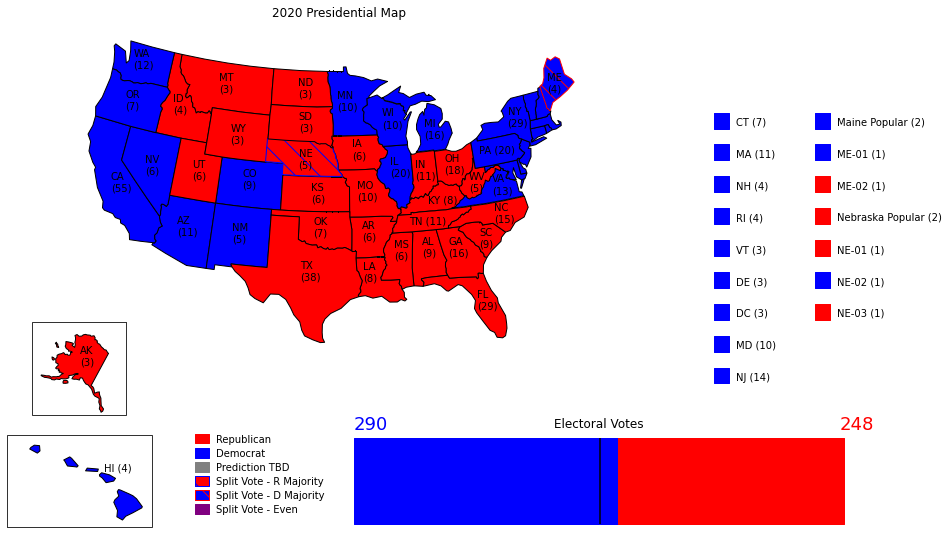

In [13]:
filename = 'my_pres_map.png'
rcount = 0
dcount = 0

small_y = 9
small_y2 = 9.5
small_label = 9.1
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(5, 5)
ax = fig.add_subplot(gs[0:-1,0:-1], projection=ccrs.LambertConformal())
axak = fig.add_subplot(gs[3,0], projection=ccrs.LambertConformal())
axhi = fig.add_subplot(gs[4,0], projection=ccrs.PlateCarree())
axsmall = fig.add_subplot(gs[1:4,-1])
axcount = fig.add_subplot(gs[4,2:])
axleg = fig.add_subplot(gs[4,1])
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
axak.set_extent([-170, -130, 54, 72], ccrs.Geodetic())
axhi.set_extent([-160.8,-154.4,18.6,22.7], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('2020 Presidential Map')

axsmall.set_xlim(0,10)
axsmall.set_ylim(0,10)
axsmall.axis('off')

for astate in shpreader.Reader(states_shp).records():
    
    edgecolor = 'black'
    facecolor = ''
    try:
        
        pick = states[ astate.attributes['name'] ]['prediction']
    except:
        state_dens = 0

    if pick == 'Republican':
        facecolor = 'red'
    elif pick == 'Democrat':
        facecolor = 'blue'
    elif pick == 'NE':
        facecolor = 'lightgray'
    else:
        facecolor = 'gray'
    
    if astate.attributes['name'] == 'Alaska':
        axak.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)
        axak.text(states[astate.attributes['name']]['Lon'], states[astate.attributes['name']]['Lat'],astate.attributes['name_alt'][0:2]+'\n('+str(states[astate.attributes['name']]['EV'])+')', horizontalalignment='left', 
               transform=ccrs.PlateCarree())
    elif astate.attributes['name'] == 'Hawaii':
        axhi.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)
        axhi.text(states[astate.attributes['name']]['Lon'], states[astate.attributes['name']]['Lat'],astate.attributes['name_alt'][0:2]+' ('+str(states[astate.attributes['name']]['EV'])+')', horizontalalignment='left', 
               transform=ccrs.PlateCarree())
    elif astate.attributes['name'] == 'Nebraska':
        dem_neb = [Nebraska_popular,Nebraska_popular,Nebraska_CD1,Nebraska_CD2,Nebraska_CD3].count('Democrat')
        rep_neb = [Nebraska_popular,Nebraska_popular,Nebraska_CD1,Nebraska_CD2,Nebraska_CD3].count('Republican')
        if dem_neb == 0 and rep_neb == 0:
            facecolor = 'gray'
            edgecolor = 'black'
            ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor,edgecolor=edgecolor)
        elif dem_neb == 0:
            facecolor = 'red'
            edgecolor = 'black'
            ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor,edgecolor=edgecolor)
        elif rep_neb == 0:
            facecolor = 'blue'
            edgecolor = 'black'
            ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor,edgecolor=edgecolor)
        elif dem_neb > rep_neb:
            facecolor = 'blue'
            edgecolor = 'red'
            ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor,hatch='r\\')
        elif dem_neb < rep_neb:
            facecolor = 'red'
            edgecolor = 'blue'
            ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor,hatch='r\\')
        elif dem_neb == rep_neb:
            facecolor = 'purple'
            edgecolor = 'black'
            ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor,edgecolor=edgecolor)
        if Nebraska_popular == 'Republican':
            neb_pop_color = 'red'
        elif Nebraska_popular == 'Democrat':
            neb_pop_color = 'blue'
        else:
            neb_pop_color = 'gray'
        if Nebraska_CD1 == 'Republican':
            neb_cd1_color = 'red'
        elif Nebraska_CD1 == 'Democrat':
            neb_cd1_color = 'blue'
        else:
            neb_cd1_color = 'gray'
        if Nebraska_CD2 == 'Republican':
            neb_cd2_color = 'red'
        elif Nebraska_CD2 == 'Democrat':
            neb_cd2_color = 'blue'
        else:
            neb_cd2_color = 'gray'
        if Nebraska_CD3 == 'Republican':
            neb_cd3_color = 'red'
        elif Nebraska_CD3 == 'Democrat':
            neb_cd3_color = 'blue'
        else:
            neb_cd3_color = 'gray'
        axsmall.fill_betweenx((6,6.5),8,9,color=neb_pop_color)
        axsmall.annotate('Nebraska Popular (2)',(9.5,6.1))
        axsmall.fill_betweenx((5,5.5),8,9,color=neb_cd1_color)
        axsmall.annotate('NE-01 (1)',(9.5,5.1))
        axsmall.fill_betweenx((4,4.5),8,9,color=neb_cd2_color)
        axsmall.annotate('NE-02 (1)',(9.5,4.1))
        axsmall.fill_betweenx((3,3.5),8,9,color=neb_cd3_color)
        axsmall.annotate('NE-03 (1)',(9.5,3.1))
        
    elif astate.attributes['name'] == 'Maine':
        dem_me = [Maine_popular,Maine_popular,Maine_CD1,Maine_CD2].count('Democrat')
        rep_me = [Maine_popular,Maine_popular,Maine_CD1,Maine_CD2].count('Republican')
        if dem_me == 0 and rep_me == 0:
            facecolor = 'gray'
            edgecolor = 'black'
            ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor,edgecolor=edgecolor)
        elif dem_me == 0:
            facecolor = 'red'
            edgecolor = 'black'
            ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor,edgecolor=edgecolor)
        elif rep_me == 0:
            facecolor = 'blue'
            edgecolor = 'black'
            ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor,edgecolor=edgecolor)
        elif dem_me > rep_me:
            facecolor = 'blue'
            edgecolor = 'red'
            ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor,hatch='r\\')
        elif dem_me < rep_me:
            facecolor = 'red'
            edgecolor = 'blue'
            ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor,hatch='r\\')
        elif dem_me == rep_me:
            facecolor = 'purple'
            edgecolor = 'black'
            ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor,edgecolor=edgecolor)
        
        if Maine_popular == 'Republican':
            me_pop_color = 'red'
        elif Maine_popular == 'Democrat':
            me_pop_color = 'blue'
        else:
            me_pop_color = 'gray'
        if Maine_CD1 == 'Republican':
            me_cd1_color = 'red'
        elif Maine_CD1 == 'Democrat':
            me_cd1_color = 'blue'
        else:
            me_cd1_color = 'gray'
        if Maine_CD2 == 'Republican':
            me_cd2_color = 'red'
        elif Nebraska_CD2 == 'Democrat':
            me_cd2_color = 'blue'
        else:
            me_cd2_color = 'gray'
       
        axsmall.fill_betweenx((9,9.5),8,9,color=me_pop_color)
        axsmall.annotate('Maine Popular (2)',(9.5,9.1))
        axsmall.fill_betweenx((8,8.5),8,9,color=me_cd1_color)
        axsmall.annotate('ME-01 (1)',(9.5,8.1))
        axsmall.fill_betweenx((7,7.5),8,9,color=me_cd2_color)
        axsmall.annotate('ME-02 (1)',(9.5,7.1))
        
        
        
    # `astate.geometry` is the polygon to plot
    if astate.attributes['name'] != 'Nebraska' and astate.attributes['name'] != 'Maine':
        ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
    if astate.attributes['name'] not in small_states and astate.attributes['name'] not in ['Hawaii','Alaska','Pennsylvania','Kentucky','Tennessee']:
        ax.text(states[astate.attributes['name']]['Lon'], states[astate.attributes['name']]['Lat'],astate.attributes['name_alt'][0:2]+'\n('+str(states[ astate.attributes['name'] ]['EV'])+')', horizontalalignment='left', 
               transform=ccrs.PlateCarree())
    elif astate.attributes['name'] == 'Pennsylvania':
        ax.text(states[astate.attributes['name']]['Lon'], states[astate.attributes['name']]['Lat'],astate.attributes['name_alt'][len(astate.attributes['name_alt'])-2:]+' ('+str(states[ astate.attributes['name'] ]['EV'])+')', horizontalalignment='left', 
               transform=ccrs.PlateCarree())
    elif astate.attributes['name'] == 'Kentucky':
        ax.text(states[astate.attributes['name']]['Lon'], states[astate.attributes['name']]['Lat'],'KY'+' ('+str(states[astate.attributes['name']]['EV'])+')', horizontalalignment='left', transform=ccrs.PlateCarree())
    elif astate.attributes['name'] == 'Tennessee':
        ax.text(states[astate.attributes['name']]['Lon'], states[astate.attributes['name']]['Lat'],astate.attributes['name_alt'][0:2]+' ('+str(states[ astate.attributes['name'] ]['EV'])+')', horizontalalignment='left', 
               transform=ccrs.PlateCarree())
    
    if astate.attributes['name'] in small_states:
        if astate.attributes['name'] == 'Massachusetts':
            axsmall.fill_betweenx((small_y,small_y2),1,2,color=facecolor)
            axsmall.annotate('MA ('+str(states[ astate.attributes['name'] ]['EV'])+')',(2.5,small_label))
        elif astate.attributes['name'] == 'Rhode Island':
            axsmall.fill_betweenx((small_y,small_y2),1,2,color=facecolor)
            axsmall.annotate('RI ('+str(states[ astate.attributes['name'] ]['EV'])+')',(2.5,small_label))
        else:
            axsmall.fill_betweenx((small_y,small_y2),1,2,color=facecolor)
            axsmall.annotate(astate.attributes['name_alt'][0:2]+' ('+str(states[ astate.attributes['name'] ]['EV'])+')',(2.5,small_label))
        small_y -= 1
        small_y2 -= 1
        small_label -= 1
    
        
for astate in shpreader.Reader(states_shp).records():
    if astate.attributes['name'] == 'Nebraska':
        dcount += dem_neb
        rcount += rep_neb
    elif astate.attributes['name'] == 'Maine':
        dcount += dem_me
        rcount += rep_me
    elif states[ astate.attributes['name'] ]['prediction'] == 'Republican':
        rcount += states[ astate.attributes['name'] ]['EV']
    elif states[ astate.attributes['name'] ]['prediction'] == 'Democrat':
        dcount += states[ astate.attributes['name'] ]['EV']
        

axcount.fill_betweenx((0,0.5),0,dcount,color='blue')
axcount.fill_betweenx((0,0.5),538-rcount,538,color='red')
axcount.set_xlim(0,538)
axcount.vlines(270,0,0.5,color='black')
axcount.text(0,.55,str(dcount),color='blue',fontsize=18)
axcount.text(533,.55,str(rcount),color='red',fontsize = 18)
axcount.axis('off')
axcount.set_title('Electoral Votes')    


axleg.set_xlim(0,10)
axleg.set_ylim(0,10)
axleg.axis('off')
axleg.fill_betweenx((9,10),1,2,color='red')
axleg.annotate('Republican',(2.5,9.1))
axleg.fill_betweenx((7.5,8.5),1,2,color='blue')
axleg.annotate('Democrat',(2.5,7.6))
axleg.fill_betweenx((6,7),1,2,color='gray')
axleg.annotate('Prediction TBD',(2.5,6.1))
axleg.fill_betweenx((4.5,5.5),1,2,facecolor='red',edgecolor='blue',hatch='r\\')
axleg.annotate('Split Vote - R Majority',(2.5,4.6))
axleg.fill_betweenx((3,4),1,2,facecolor='blue',edgecolor='red',hatch='r\\')
axleg.annotate('Split Vote - D Majority',(2.5,3.1))
axleg.fill_betweenx((1.5,2.5),1,2,color='purple')
axleg.annotate('Split Vote - Even',(2.5,1.6))
plt.savefig(filename)
plt.show()

### Step 6: Save your file

To get to this page, you first were sent to a Jupyter Home Page, and you clicked on the Senate Map and this page opened in a new tab. Go back to the tab with the Home Page and you will see your new map file, click on it, and download to your device so you can keep your map as long as you wish.

If you cannot find the Home Page, right-click on the Jupyter logo and open it in a new tab. You should be able to locate your new file there.

You are encouraged to post your map here: https://www.electionperfection.org/forum